<a href="https://colab.research.google.com/github/pmigua/Inteligencia-artificial/blob/Colab/E1_Exploratory_data_analysis_Pablo_Miguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apartado 1

Lo primero es importar las librerías que son necesarias

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

A continuación se carga el data set de los planetas

In [ ]:
import seaborn as sns

df = sns.load_dataset('planets')

Se visualizan los datos

In [ ]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
print(df) #otra forma de visualizarlos

               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


In [ ]:
Se cuenta el número de filas y de columnas

In [ ]:
df.shape #con este comando se devuelve (filas, columnas)

(1035, 6)

Se identifica el tipo de cada una de las variables

In [ ]:
df.dtypes

,0
method,object
number,int64
orbital_period,float64
mass,float64
distance,float64
year,int64


A continuación se ve si hay duplicados, cúantos y se eliminan

In [ ]:
print(df.duplicated().any()) #devuelve "True" si hay duplicados
df.duplicated().sum() #devuelve la cantidad de duplicados

True


np.int64(4)

In [ ]:
df2 = df.drop_duplicates() #se crea un nuevo conjunto de datos sin los duplicados
df2 #a partir de ahora se trabajará con este conjunto de datos

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


De la misma manera se ve si hay NaNs, cuántos hay en cada método y se eliminan

In [ ]:
print(df.isna().any()) #devuelve "True" en cada método si hay NaNs
df.isna().sum() #se contavilizan los NaNs

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool


,0
method,0
number,0
orbital_period,43
mass,522
distance,227
year,0


In [ ]:
df.dropna() #se eliminan los NaNs

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


Con el comando describe se pueden obtener todas las estadísticas de cada grupo

In [ ]:
df2.describe()

,number,orbital_period,mass,distance,year
count,1031.000000,992.000000,513.000000,807.000000,1031.000000
mean,1.787585,2002.917596,2.638161,259.340743,2009.069835
std,1.242641,26014.728304,3.818617,721.136649,3.978946
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.190000,2010.000000
75%,2.000000,526.005000,3.040000,176.720000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


Si queremos sacar solo la media el máximo y el mínimo organizando por ejemplo por método se hace de la siguiente manera

In [ ]:
df2.groupby('method').agg(['mean', 'max', 'min'])

number         orbital_period                 \
                                   mean max min           mean            max   
method                                                                          
Astrometry                     1.000000   1   1     631.180000    1016.000000   
Eclipse Timing Variations      1.666667   2   1    4751.644444   10220.000000   
Imaging                        1.324324   4   1  118247.737500  730000.000000   
Microlensing                   1.150000   2   1    3153.571429    5100.000000   
Orbital Brightness Modulation  1.666667   2   1       0.709307       1.544929   
Pulsar Timing                  2.200000   3   1    7343.021201   36525.000000   
Pulsation Timing Variations    1.000000   1   1    1170.000000    1170.000000   
Radial Velocity                1.721519   6   1     823.354680   17337.500000   
Transit                        1.954660   7   1      21.102073     331.600590   
Transit Timing Variations      2.250000   3   2      79.783500     160.000000   

                                                mass                 \
                                       min      mean    max     min   
method                                                                
Astrometry                      246.360000       NaN    NaN     NaN   
Eclipse Timing Variations      1916.250000  5.125000   6.05  4.2000   
Imaging                        4639.150000       NaN    NaN     NaN   
Microlensing                   1825.000000       NaN    NaN     NaN   
Orbital Brightness Modulation     0.240104       NaN    NaN     NaN   
Pulsar Timing                     0.090706       NaN    NaN     NaN   
Pulsation Timing Variations    1170.000000       NaN    NaN     NaN   
Radial Velocity                   0.736540  2.630699  25.00  0.0036   
Transit                           0.355000  1.470000   1.47  1.4700   
Transit Timing Variations        22.339500       NaN    NaN     NaN   

                                  distance                           year  \
                                      mean      max      min         mean   
method                                                                      
Astrometry                       17.875000    20.77    14.98  2011.500000   
Eclipse Timing Variations       315.360000   500.00   130.72  2010.000000   
Imaging                          67.715937   165.00     7.69  2009.162162   
Microlensing                   4151.111111  7720.00  1760.00  2009.800000   
Orbital Brightness Modulation  1180.000000  1180.00  1180.00  2011.666667   
Pulsar Timing                  1200.000000  1200.00  1200.00  1998.400000   
Pulsation Timing Variations            NaN      NaN      NaN  2007.000000   
Radial Velocity                  51.600208   354.00     1.35  2007.518987   
Transit                         599.298080  8500.00    38.00  2011.236776   
Transit Timing Variations      1104.333333  2119.00   339.00  2012.500000   

                                           
                                max   min  
method                                     
Astrometry                     2013  2010  
Eclipse Timing Variations      2012  2008  
Imaging                        2013  2004  
Microlensing                   2013  2004  
Orbital Brightness Modulation  2013  2011  
Pulsar Timing                  2011  1992  
Pulsation Timing Variations    2007  2007  
Radial Velocity                2014  1989  
Transit                        2014  2002  
Transit Timing Variations      2014  2011

In [ ]:
Q1 = df2[col].quantile(0.25)
Q3 = df2[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [ ]:
# Función para detectar outliers por grupo
def detectar_outliers_por_metodo(df, col):
    outliers_dict = {}

    for metodo, grupo in df.groupby("method"):
        Q1 = grupo[col].quantile(0.25)
        Q3 = grupo[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar valores atípicos
        outliers = grupo[(grupo[col] < lower_bound) | (grupo[col] > upper_bound)]

        outliers_dict[metodo] = outliers  # Guardamos los outliers por método

    return outliers_dict

# Aplicar a la columna "orbital_period" como ejemplo
outliers_por_metodo = detectar_outliers_por_metodo(df2, "orbital_period")

# Mostrar outliers por cada método
for metodo, outliers in outliers_por_metodo.items():
    print(f"\nOutliers en método {metodo} (columna 'orbital_period'):")
    print(outliers[["method", "orbital_period"]])  # Muestra solo la columna relevante



Outliers en método Astrometry (columna 'orbital_period'):
Empty DataFrame
Columns: [method, orbital_period]
Index: []

Outliers en método Eclipse Timing Variations (columna 'orbital_period'):
                       method  orbital_period
32  Eclipse Timing Variations         10220.0

Outliers en método Imaging (columna 'orbital_period'):
      method  orbital_period
68   Imaging        318280.0
937  Imaging        730000.0

Outliers en método Microlensing (columna 'orbital_period'):
Empty DataFrame
Columns: [method, orbital_period]
Index: []

Outliers en método Orbital Brightness Modulation (columna 'orbital_period'):
Empty DataFrame
Columns: [method, orbital_period]
Index: []

Outliers en método Pulsar Timing (columna 'orbital_period'):
            method  orbital_period
944  Pulsar Timing         36525.0

Outliers en método Pulsation Timing Variations (columna 'orbital_period'):
Empty DataFrame
Columns: [method, orbital_period]
Index: []

Outliers en método Radial Velocity (columna 

# Apartado 2

<Figure size 600x400 with 0 Axes>

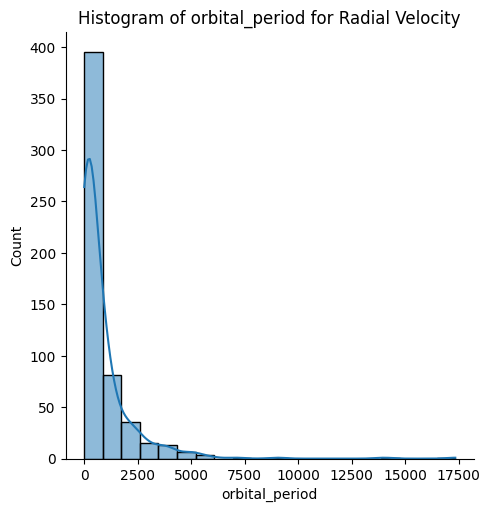

<Figure size 600x400 with 0 Axes>

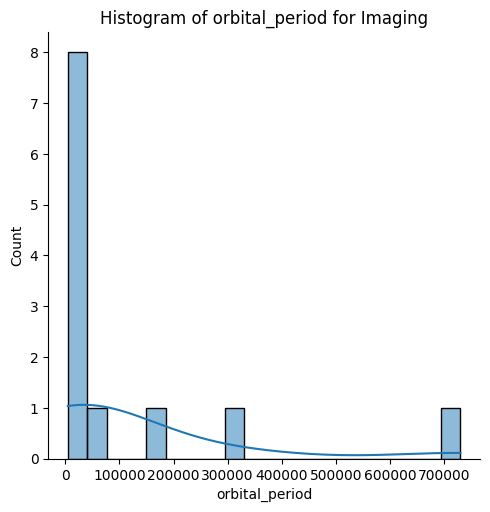

<Figure size 600x400 with 0 Axes>

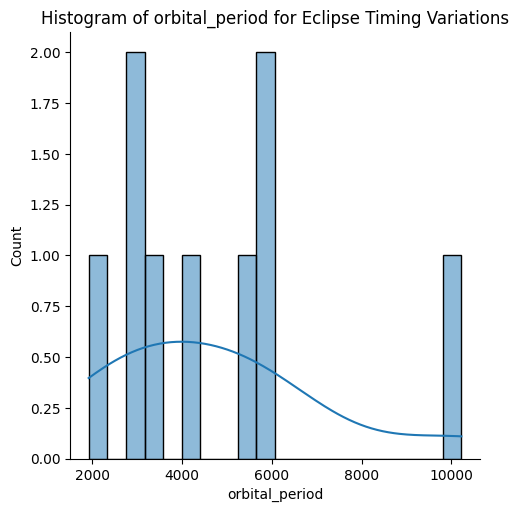

<Figure size 600x400 with 0 Axes>

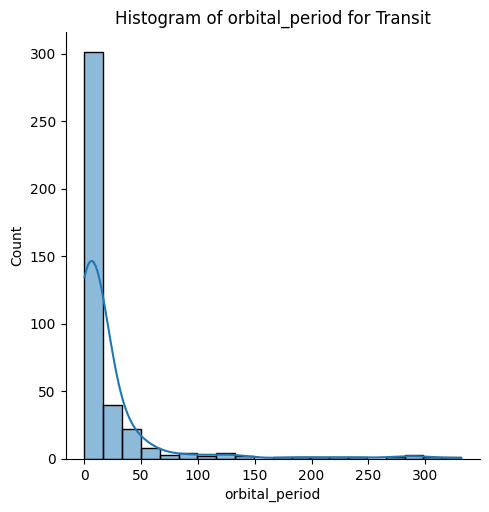

<Figure size 600x400 with 0 Axes>

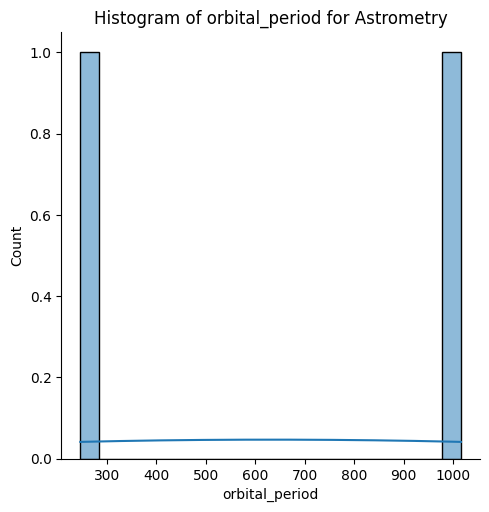

<Figure size 600x400 with 0 Axes>

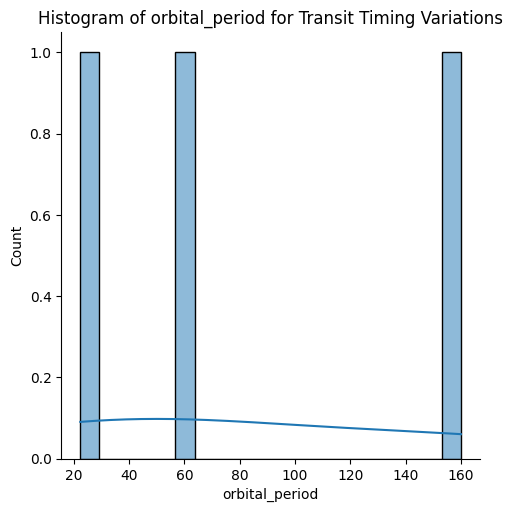

<Figure size 600x400 with 0 Axes>

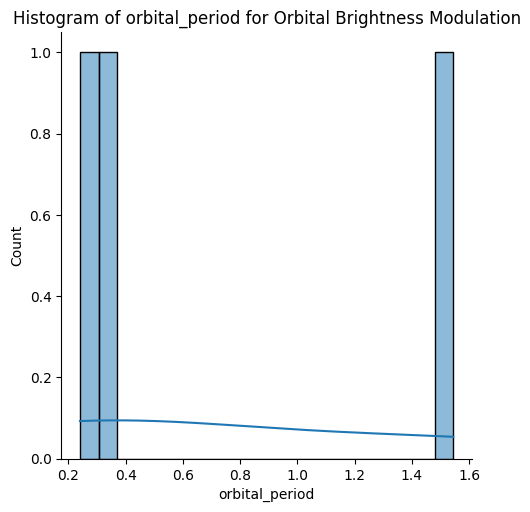

<Figure size 600x400 with 0 Axes>

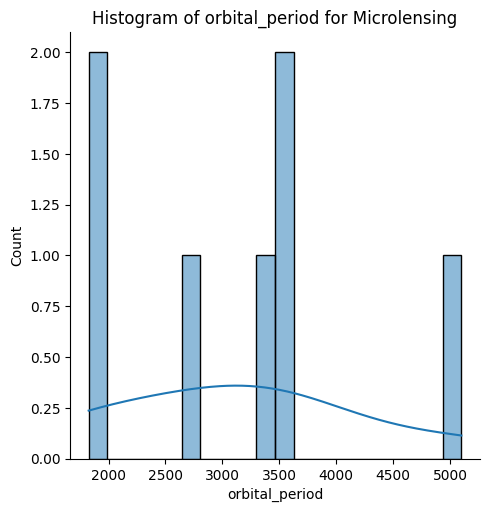

<Figure size 600x400 with 0 Axes>

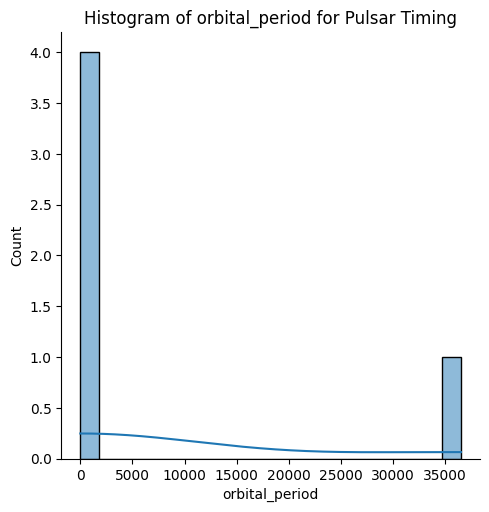

<Figure size 600x400 with 0 Axes>

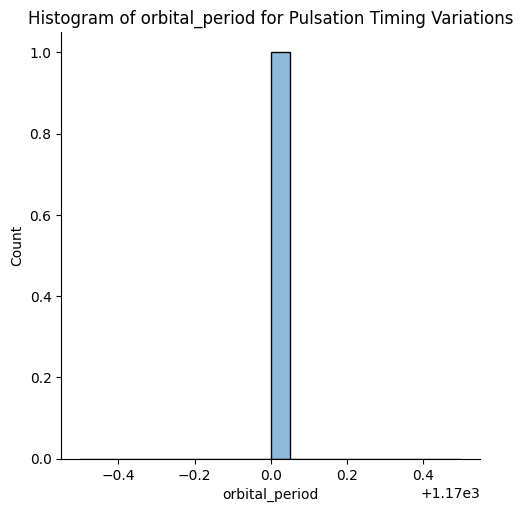

In [ ]:
column_to_plot = 'orbital_period'  # Puedes cambiarlo por 'mass', 'distance', etc.

# Obtener los métodos únicos de detección
methods = df2['method'].unique()

# Crear un histograma por cada método de detección
for method in methods:
    subset = df2[df2['method'] == method]  # Filtrar por método
    plt.figure(figsize=(6, 4))
    sns.displot(subset[column_to_plot].dropna(), bins=20, kde=True)
    plt.title(f'Histogram of {column_to_plot} for {method}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Count')
    plt.show()

<Figure size 600x400 with 0 Axes>

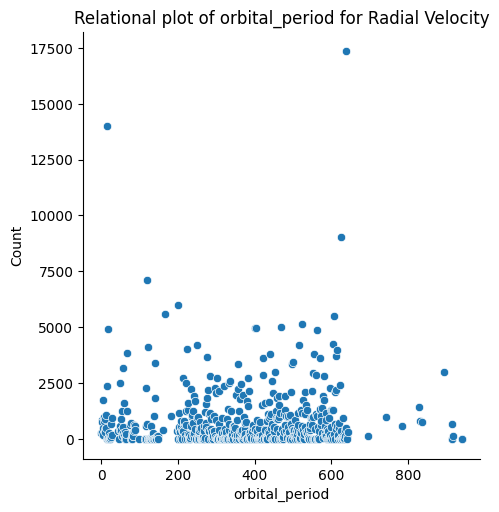

<Figure size 600x400 with 0 Axes>

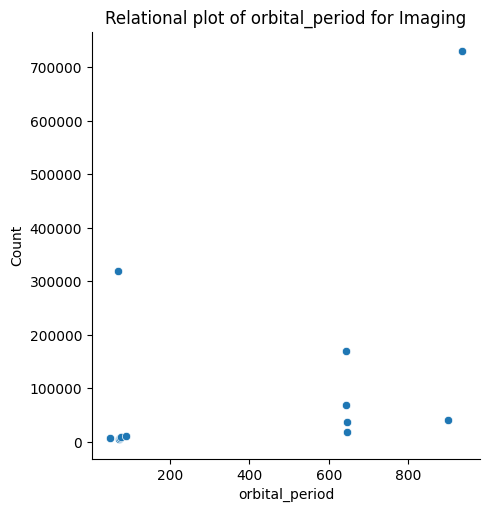

<Figure size 600x400 with 0 Axes>

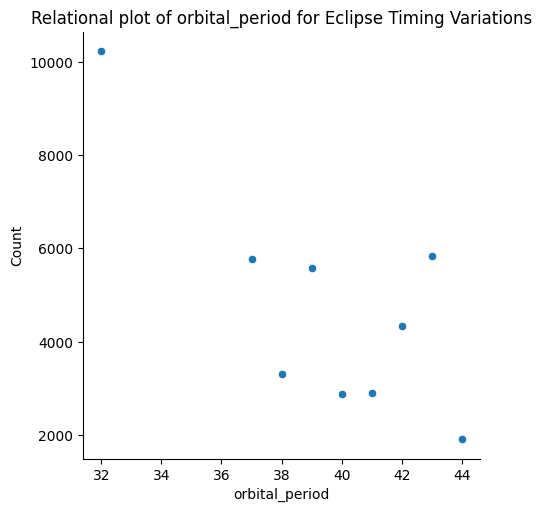

<Figure size 600x400 with 0 Axes>

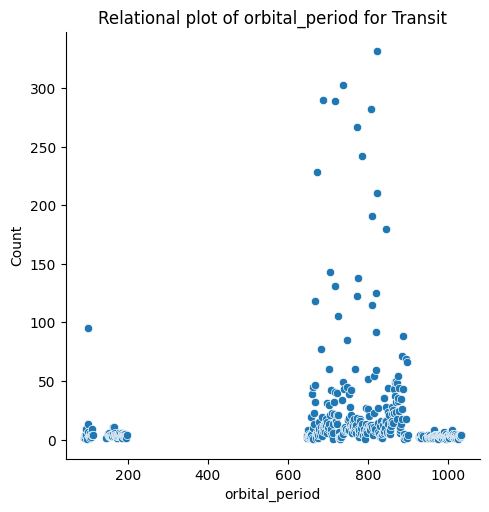

<Figure size 600x400 with 0 Axes>

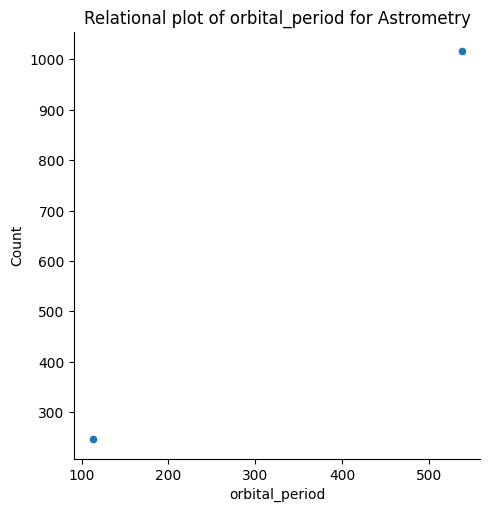

<Figure size 600x400 with 0 Axes>

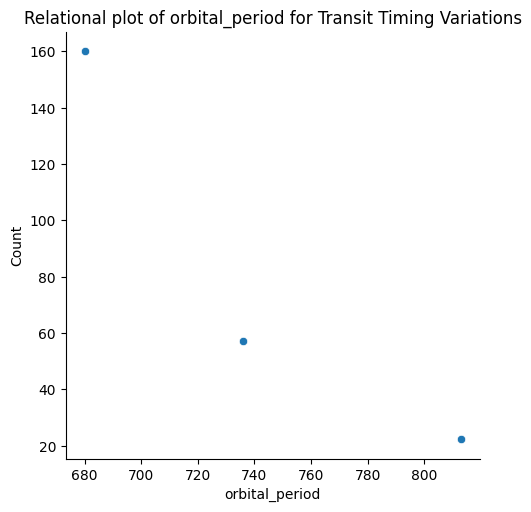

<Figure size 600x400 with 0 Axes>

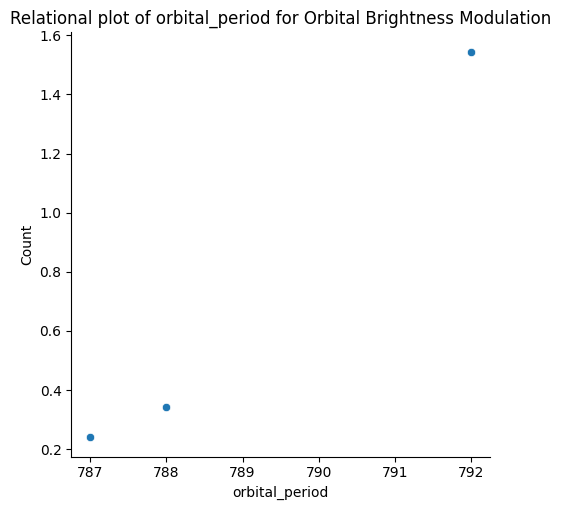

<Figure size 600x400 with 0 Axes>

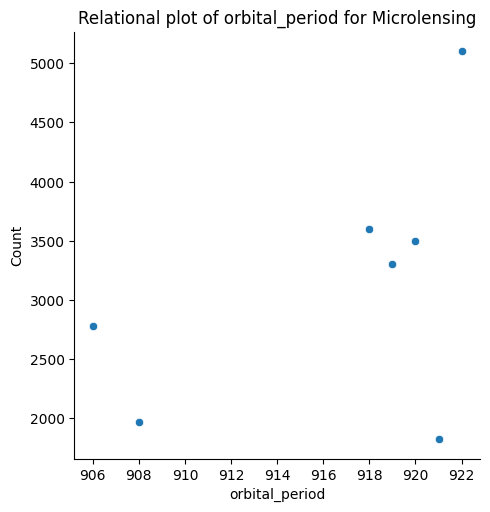

<Figure size 600x400 with 0 Axes>

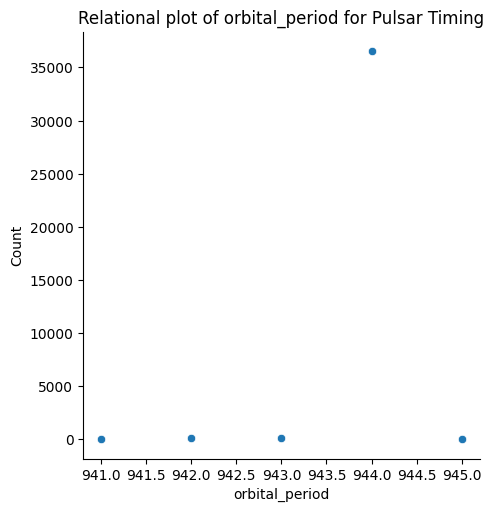

<Figure size 600x400 with 0 Axes>

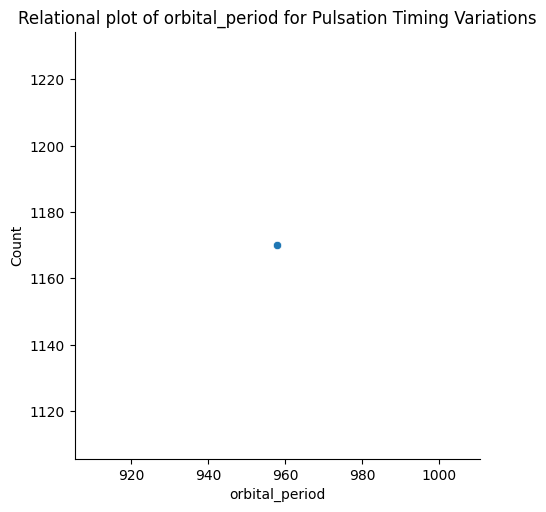

In [ ]:
column_to_plot = 'orbital_period'  # Puedes cambiarlo por 'mass', 'distance', etc.

# Obtener los métodos únicos de detección
methods = df2['method'].unique()

# Crear un histograma por cada método de detección
for method in methods:
    subset = df2[df2['method'] == method]  # Filtrar por método
    plt.figure(figsize=(6, 4))
    sns.relplot(subset[column_to_plot].dropna())
    plt.title(f'Relational plot of {column_to_plot} for {method}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Count')
    plt.show()